In [136]:
#%load_ext sql
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [137]:
import os
import pandas as pd
import psycopg2
from matplotlib import pyplot as plt

In [138]:
host = "localhost"
database = "SQL_homework"
user = "postgres"
password = "postgres"

In [139]:
engine = create_engine(f"postgresql://{user}:{password}@{host}/{database}")
conn = engine.connect()

In [140]:
session = Session(engine)
session

In [141]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['employees', 'titles', 'salaries', 'departments']

In [142]:
employees_df = pd.read_sql("SELECT * FROM employees", conn)
employees_df.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991


In [143]:
salaries_df = pd.read_sql("SELECT * FROM salaries", conn)
salaries_df

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [144]:
salaries_df.describe()

,emp_no,salary
count,300024.000000,300024.000000
mean,253321.763392,52970.732451
std,161828.235540,14301.478491
min,10001.000000,40000.000000
25%,85006.750000,40000.000000
50%,249987.500000,48681.000000
75%,424993.250000,61758.000000
max,499999.000000,129492.000000


In [145]:
per_salary = salaries_df.groupby("emp_no")["salary"].sum().reset_index()
per_salary

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


<IPython.core.display.Javascript object>


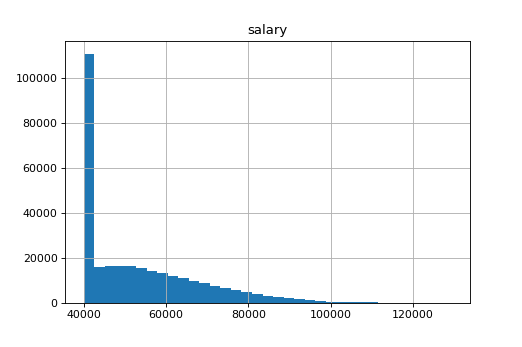

In [146]:
per_salary.hist(column='salary', bins=35);


<IPython.core.display.Javascript object>


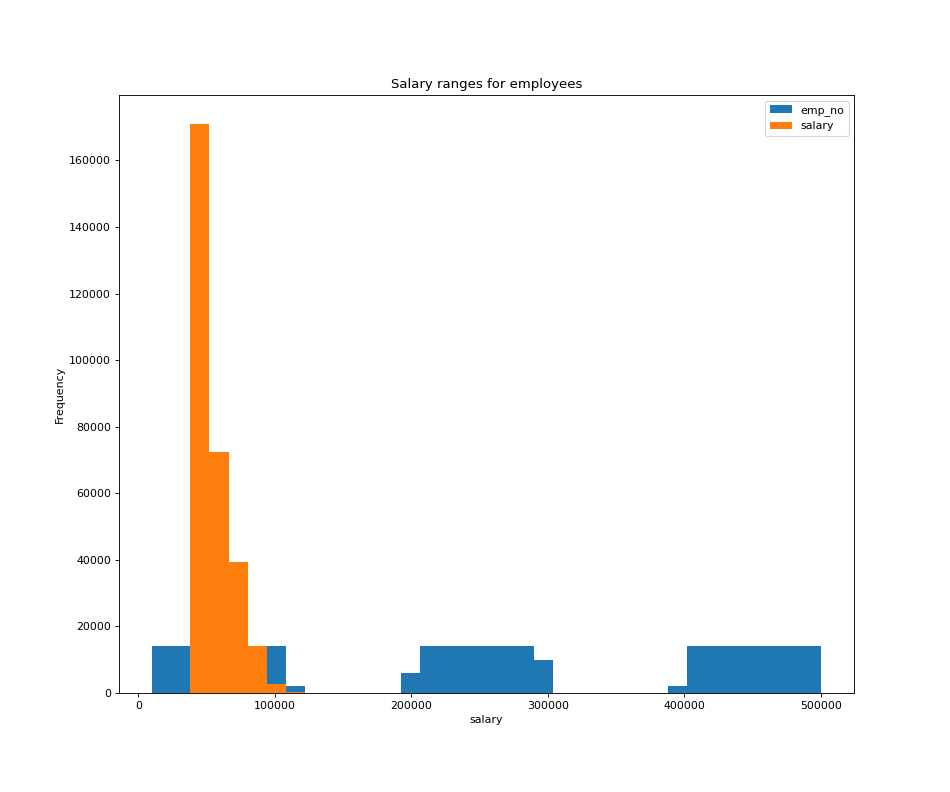

<function matplotlib.pyplot.show(block=None)>

In [147]:
per_salary.plot(kind="hist", by="salary", bins=35, figsize=(12,10))
plt.title("Salary ranges for employees")
plt.xlabel("salary")
plt.show

In [148]:
titles_df = pd.read_sql("SELECT * FROM titles", conn)
titles_df

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [149]:
title_employee_df = pd.merge(titles_df,employees_df , how="left", on=["title_id", "title_id"])
title_employee_df

,title_id,title,emp_no,birth_date,first_name,last_name,sex,hire_date
0,s0001,Staff,473302,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,s0001,Staff,421786,9/28/1957,Xiong,Verhoeff,M,11/26/1987
2,s0001,Staff,273487,4/14/1957,Christoph,Parfitt,M,6/28/1991
3,s0001,Staff,246449,3/23/1958,Subbu,Bultermann,F,3/25/1988
4,s0001,Staff,48085,1/19/1964,Venkatesan,Gilg,M,6/28/1993
...,...,...,...,...,...,...,...,...
300019,m0001,Manager,111400,11/9/1959,Arie,Staelin,M,1/1/1985
300020,m0001,Manager,111133,3/16/1955,Hauke,Zhang,M,12/30/1986
300021,m0001,Manager,110085,10/28/1959,Ebru,Alpin,M,1/1/1985
300022,m0001,Manager,110386,10/4/1953,Shem,Kieras,M,10/14/1988


In [150]:
title_salary_df = pd.merge(title_employee_df, salaries_df, how="inner", on=["emp_no", "emp_no"])
title_salary_df.head()

,title_id,title,emp_no,birth_date,first_name,last_name,sex,hire_date,salary
0,s0001,Staff,473302,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000
1,s0001,Staff,421786,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000
2,s0001,Staff,273487,4/14/1957,Christoph,Parfitt,M,6/28/1991,56087
3,s0001,Staff,246449,3/23/1958,Subbu,Bultermann,F,3/25/1988,87084
4,s0001,Staff,48085,1/19/1964,Venkatesan,Gilg,M,6/28/1993,63016


In [151]:
title_salary_df['title'].unique()

array(['Staff', 'Senior Staff', 'Assistant Engineer', 'Engineer',
       'Senior Engineer', 'Technique Leader', 'Manager'], dtype=object)

In [152]:
final_df = title_salary_df[["title", "salary"]]
final = final_df.set_index("title")
final

,salary
title,
Staff,40000
Staff,40000
Staff,56087
Staff,87084
Staff,63016
...,...
Manager,72446
Manager,71148
Manager,60026


In [153]:
staff = final.loc["Staff"]
average = staff[["salary"]].mean()
average

salary    58465.38285
dtype: float64

In [154]:
s_staff = final.loc["Senior Staff"]
average = s_staff[["salary"]].mean()
average

salary    58550.172704
dtype: float64

In [155]:
a_engineer = final.loc["Assistant Engineer"]
average = a_engineer[["salary"]].mean()
average

salary    48564.434447
dtype: float64

In [156]:
engineer = final.loc["Engineer"]
average = engineer[["salary"]].mean()
average

salary    48535.336511
dtype: float64

In [157]:
s_engineer = final.loc["Senior Engineer"]
average = s_engineer[["salary"]].mean()
average

salary    48506.799871
dtype: float64

In [158]:
t_leader = final.loc["Technique Leader"]
average = t_leader[["salary"]].mean()
average

salary    48582.896092
dtype: float64

In [159]:
manager = final.loc["Manager"]
average = manager[["salary"]].mean()
average

salary    51531.041667
dtype: float64

In [160]:
# summary average salary based on title
average_salary_title_df = pd.DataFrame({"title":['Staff', 'Senior Staff', 'Assistant Engineer', 'Engineer',
       'Senior Engineer', 'Technique Leader', 'Manager'],
                                        "Average Salary":[ 58465.38285,58550.172704, 48564.434447,48535.336511,48506.799871,48582.896092,51531.041667]
                                       })

average_salary_title_df.set_index('title')

,Average Salary
title,
Staff,58465.382850
Senior Staff,58550.172704
Assistant Engineer,48564.434447
Engineer,48535.336511
Senior Engineer,48506.799871
Technique Leader,48582.896092
Manager,51531.041667


In [166]:
average_salary_title_df.describe()

,Average Salary
count,7.000000
mean,51819.437735
std,4697.227740
min,48506.799871
25%,48549.885479
50%,48582.896092
75%,54998.212259
max,58550.172704


<IPython.core.display.Javascript object>


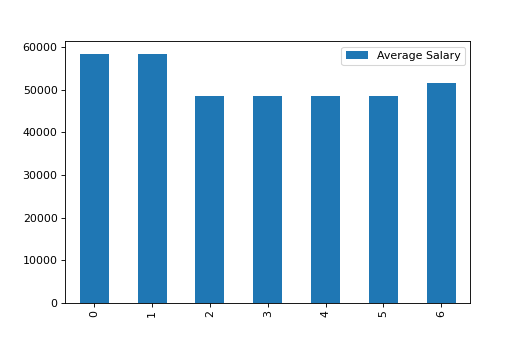

<AxesSubplot:>

In [161]:
average_salary_title_df[["Average Salary"]].plot.bar()

<IPython.core.display.Javascript object>


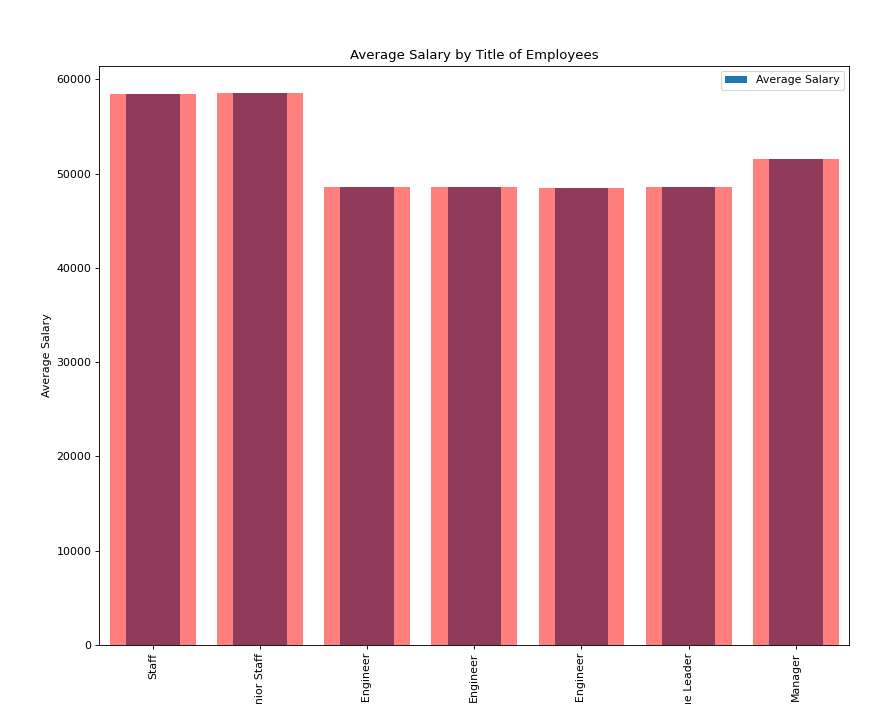

In [162]:
average_salary_title_df.plot.bar()
plt.title("Average Salary by Title of Employees")
plt.tight_layout()

In [163]:
title=['Staff', 'Senior Staff', 'Assistant Engineer', 'Engineer',
       'Senior Engineer', 'Technique Leader', 'Manager']
Average_Salary=[ 58465.38285,58550.172704, 48564.434447,48535.336511,48506.799871,48582.896092,51531.041667]
plt.bar(title,Average_Salary , color='r', alpha=0.5, align="center")

<BarContainer object of 7 artists>

In [164]:
# Give our chart some labels and a tile
plt.title("Average Salary by Title of Employees")
plt.xlabel("Title")
plt.ylabel("Average Salary")

Text(6.867286787078612, 0.5, 'Average Salary')

In [165]:
tick_locations = title
tick_labels = ['Staff', 'Senior Staff', 'Assistant Engineer', 'Engineer',
       'Senior Engineer', 'Technique Leader', 'Manager']
plt.xticks(tick_locations, tick_labels)

([<matplotlib.axis.XTick at 0x1ef91de1b80>,
 [Text(0.0, 0, 'Staff'),
  Text(1.0, 0, 'Senior Staff'),
  Text(2.0, 0, 'Assistant Engineer'),
  Text(3.0, 0, 'Engineer'),
  Text(4.0, 0, 'Senior Engineer'),
  Text(5.0, 0, 'Technique Leader'),
  Text(6.0, 0, 'Manager')])